# REDES NEURONALES DENSAS

## Multi-Layer Perceptron (MLP)

En este notebook implementaremos un **Perceptrón Multicapa (MLP)**. A diferencia del Modelo 1 (que era una red lineal simple), el MLP introduce **capas ocultas** con funciones de activación no lineales (ReLU), lo que le permite aprender patrones mucho más complejos en las imágenes de Fashion MNIST.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# 1. Carga de datos
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 2. Normalización
X_train_full = X_train_full.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 3. División Entrenamiento / Validación
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

X_train shape: (48000, 28, 28), y_train shape: (48000,)


## 2. Definición del Modelo MLP

Diseñaremos una arquitectura con dos capas ocultas densas. La no linealidad introducida por la función **ReLU** es clave para superar las limitaciones de los modelos lineales.

In [8]:
def build_mlp_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)), # Entrada de 784 neuronas
        layers.Dense(256, activation='relu'), # Capa oculta 1
        layers.Dense(128, activation='relu'), # Capa oculta 2
        layers.Dropout(0.2),                  # Regularización para evitar overfitting
        layers.Dense(10, activation='softmax') # Capa de salida
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model_mlp = build_mlp_model()
model_mlp.summary()

d:\Uni\Aprendizaje profundo\ProyectoAP\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

## 3. Entrenamiento

Entrenamos el modelo y visualizamos las curvas de aprendizaje.

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8108 - loss: 0.5285 - val_accuracy: 0.8602 - val_loss: 0.3868
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8601 - loss: 0.3857 - val_accuracy: 0.8752 - val_loss: 0.3450
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8702 - loss: 0.3510 - val_accuracy: 0.8798 - val_loss: 0.3346
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8798 - loss: 0.3253 - val_accuracy: 0.8849 - val_loss: 0.3267
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8866 - loss: 0.3077 - val_accuracy: 0.8752 - val_loss: 0.3466
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 958us/step - accuracy: 0.8898 - loss: 0.2933 - val_accuracy: 0.8852 - val_loss: 0.3106
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 959us/step - accuracy: 0.8951 - loss: 0.2799 - val_accuracy: 0.8881 - val_loss: 0.3226
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8989 - loss: 0.269

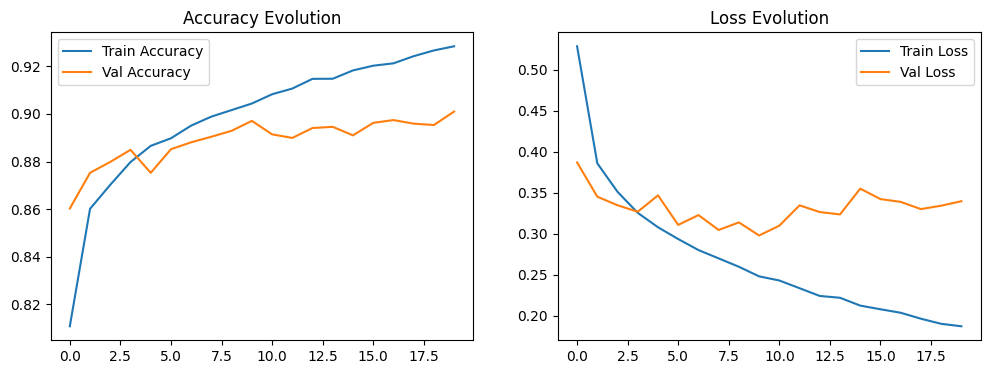

In [9]:
history = model_mlp.fit(X_train, y_train,
                        epochs=20,
                        batch_size=32,
                        validation_data=(X_val, y_val),
                        verbose=1)

# Visualización de curvas
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Evolution')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Evolution')
plt.legend()
plt.show()

## 4. Matriz de Confusión

Visualizamos dónde se confunde el modelo utilizando el conjunto de test.

In [ ]:
y_pred = np.argmax(model_mlp.predict(X_test), axis=-1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - MLP')
plt.show()

## 5. Evaluación Final

In [ ]:
test_loss, test_acc = model_mlp.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy en Test: {test_acc:.4f}")

## Resumen de Resultados - MLP

| Modelo | Estructura | Parámetros | Test Acc |
| :--- | :---: | :---: | :---: |
| **MLP** | 784-256-128-10 | ~235,146 | **~0.89** |

### Análisis del Modelo MLP y Comparativa

El **Perceptrón Multicapa (MLP)** representa un salto significativo respecto al modelo lineal.

**Capacidad de aprendizaje:** Al tener más de 200,000 parámetros y capas ocultas con ReLU, el modelo puede aprender combinaciones de píxeles que representan formas más complejas. Esto se traduce en una mejora clara de la precisión, situándose cerca del 89%.

**Comparativa con SVM:** Es interesante observar que, en este dataset particular, **el rendimiento del MLP iguala al de la SVM**. Ambos modelos alcanzan un techo similar de precisión (alrededor del 88-90%). Esto sugiere que para Fashion MNIST, la capacidad de extraer características medias es similar tanto en modelos clásicos potentes (SVM con RBF) como en arquitecturas sencillas de redes densas (MLP).

**Conclusión:** Aunque igualan en precisión, el MLP escala mejor si aumentamos masivamente el número de datos y es mucho más flexible para añadir capas de regularización o estructuras más profundas en el futuro.

**Reto:**
Nuestro principal reto aparente será conseguir mejorar la clasificacion de las clases muy similares como Camisas y Abrigos.
Podremos añadir mas capas al modelo profundo o probar funciones de perdida ajustadas para penalizar mas los errores en las clases muy similares.